# 6. Conversion des bounding boxes en géométries et carto

In [1]:
import pandas as pd
import geopandas as gpd
import fiona
from shapely.geometry import Polygon
import matplotlib.pyplot as plt

Lecture des piscines détectées

In [2]:
pools_bbox = pd.read_csv("../data/detected_pools_bbox.csv")

On utilise les coordonnées d'angle pour recréer un polygone (rectangle)

In [3]:
def create_polygon(row):
    xmin, ymin, xmax, ymax = row['xmin'], row['ymin'], row['xmax'], row['ymax']
    return Polygon([(xmin, ymin), (xmin, ymax), (xmax, ymax), (xmax, ymin), (xmin, ymin)])

pools_bbox['geometry'] = pools_bbox.apply(create_polygon, axis=1)

Exportation en .gpkg, coordonnées suisses

In [4]:
geo_pools_bbox = gpd.GeoDataFrame(pools_bbox, geometry='geometry', crs="EPSG:2056")
geo_pools_bbox.to_file("../data/detected_pools.gpkg", driver='GPKG')

Aperçu du résultat à l'échelle suisse (pour quelques communes)

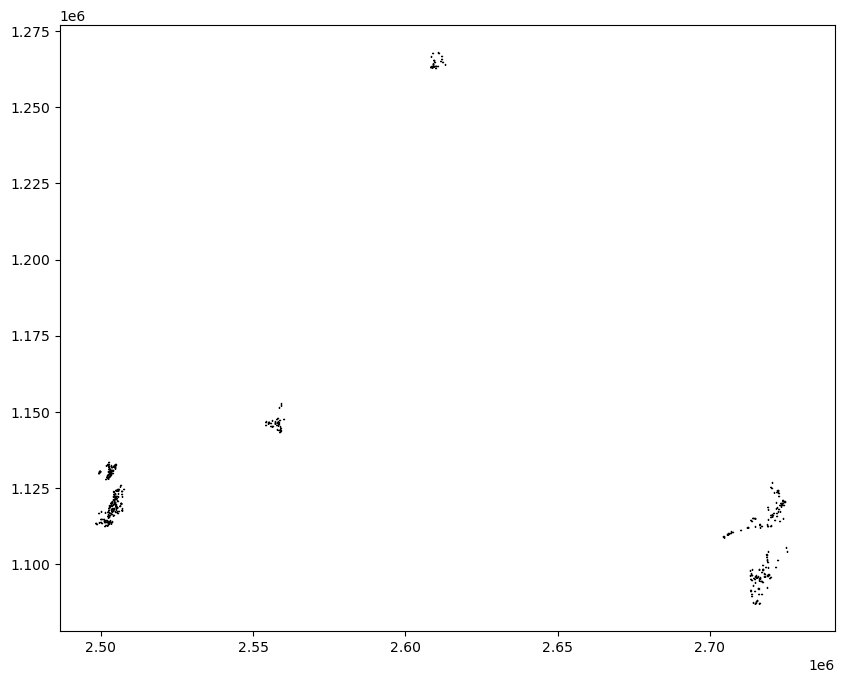

In [5]:
fig, ax = plt.subplots(figsize=(10, 10))
geo_pools_bbox.plot(ax=ax, color='blue', edgecolor='black')
plt.show()

Exportation en .kml et .geojson (coordonnées WGS84) pour affichage dans les outils en ligne

In [6]:
fiona.supported_drivers['KML'] = 'rw'
geo_pools_bbox = geo_pools_bbox.to_crs(epsg=4326)
geo_pools_bbox.to_file('../data/detected_pools.kml', driver='KML')
geo_pools_bbox.to_file("../data/detected_pools.geojson", driver='GeoJSON')